<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1">Problem</a></span></li><li><span><a href="#Data-Info" data-toc-modified-id="Data-Info-2">Data Info</a></span></li><li><span><a href="#1-Get-data" data-toc-modified-id="1-Get-data-3">1 Get data</a></span><ul class="toc-item"><li><span><a href="#1.1-Basic-data-transformations" data-toc-modified-id="1.1-Basic-data-transformations-3.1">1.1 Basic data transformations</a></span></li></ul></li><li><span><a href="#2-EDA" data-toc-modified-id="2-EDA-4">2 EDA</a></span><ul class="toc-item"><li><span><a href="#2.1-Numerical-column" data-toc-modified-id="2.1-Numerical-column-4.1">2.1 Numerical column</a></span><ul class="toc-item"><li><span><a href="#2.1.1-REF" data-toc-modified-id="2.1.1-REF-4.1.1">2.1.1 REF</a></span></li><li><span><a href="#2.1.2-Review" data-toc-modified-id="2.1.2-Review-4.1.2">2.1.2 Review</a></span></li><li><span><a href="#2.1.3-Cocoa-Percent" data-toc-modified-id="2.1.3-Cocoa-Percent-4.1.3">2.1.3 Cocoa Percent</a></span></li><li><span><a href="#2.1.4.-Correlation-matrix-(numeric-features)" data-toc-modified-id="2.1.4.-Correlation-matrix-(numeric-features)-4.1.4">2.1.4. Correlation matrix (numeric features)</a></span></li></ul></li><li><span><a href="#2.2-Categorical-features" data-toc-modified-id="2.2-Categorical-features-4.2">2.2 Categorical features</a></span></li></ul></li><li><span><a href="#3-Outliers" data-toc-modified-id="3-Outliers-5">3 Outliers</a></span></li><li><span><a href="#4-Data-Preprocessing" data-toc-modified-id="4-Data-Preprocessing-6">4 Data Preprocessing</a></span></li><li><span><a href="#5-Feature-Engineering" data-toc-modified-id="5-Feature-Engineering-7">5 Feature Engineering</a></span></li><li><span><a href="#6-Feature-selection" data-toc-modified-id="6-Feature-selection-8">6 Feature selection</a></span><ul class="toc-item"><li><span><a href="#6.1-Numeric-features-correlation" data-toc-modified-id="6.1-Numeric-features-correlation-8.1">6.1 Numeric features correlation</a></span></li><li><span><a href="#6.2-Categorical-features-correlation" data-toc-modified-id="6.2-Categorical-features-correlation-8.2">6.2 Categorical features correlation</a></span></li></ul></li><li><span><a href="#7-Models" data-toc-modified-id="7-Models-9">7 Models</a></span><ul class="toc-item"><li><span><a href="#7.1-CatBoost-with-default-hyperparameters" data-toc-modified-id="7.1-CatBoost-with-default-hyperparameters-9.1">7.1 CatBoost with default hyperparameters</a></span></li><li><span><a href="#7.2-Hyperparameters-tunning" data-toc-modified-id="7.2-Hyperparameters-tunning-9.2">7.2 Hyperparameters tunning</a></span></li></ul></li><li><span><a href="#8-Pipelines" data-toc-modified-id="8-Pipelines-10">8 Pipelines</a></span><ul class="toc-item"><li><span><a href="#8.1-Data-preprocessing-class" data-toc-modified-id="8.1-Data-preprocessing-class-10.1">8.1 Data preprocessing class</a></span></li><li><span><a href="#8.2-Feature-engineering-class" data-toc-modified-id="8.2-Feature-engineering-class-10.2">8.2 Feature engineering class</a></span></li><li><span><a href="#8.3-FeatureFixer-class" data-toc-modified-id="8.3-FeatureFixer-class-10.3">8.3 FeatureFixer class</a></span></li><li><span><a href="#8.4-Regression-class-(for-estimation-of-rating)" data-toc-modified-id="8.4-Regression-class-(for-estimation-of-rating)-10.4">8.4 Regression class (for estimation of rating)</a></span></li></ul></li><li><span><a href="#9-Stacking" data-toc-modified-id="9-Stacking-11">9 Stacking</a></span><ul class="toc-item"><li><span><a href="#9.1-Stacking-from-SKLearn-Linear-model" data-toc-modified-id="9.1-Stacking-from-SKLearn-Linear-model-11.1">9.1 Stacking from SKLearn Linear model</a></span></li><li><span><a href="#9.2-Save-model" data-toc-modified-id="9.2-Save-model-11.2">9.2 Save model</a></span></li></ul></li><li><span><a href="#10-More-models" data-toc-modified-id="10-More-models-12">10 More models</a></span><ul class="toc-item"><li><span><a href="#10.1-New-models" data-toc-modified-id="10.1-New-models-12.1">10.1 New models</a></span></li></ul></li></ul></div>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 15,
        'axes.labelsize': 15,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'font.size': 15,
        'figure.figsize': (9, 5),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })


from sklearn.model_selection import train_test_split
import optuna
#optuna.logging.set_verbosity(optuna.logging.WARNING)
optuna.logging.set_verbosity(optuna.logging.INFO)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score

from catboost import CatBoostRegressor, CatBoostClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/competitions/practical-ml-chocolate/data
# https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/

In [2]:
!git branch

  backup
  main
* models


# Problem

В данном ноутбуке решается задача регрессии, предсказания рейтинга шоколада на основании данных о нём. Большинство предикторов являются категориальными и лишь несколько численными, поэтому в качестве библиотеки для построения модели был выбран регрессор CatBoost. Кроме того, в двух категориальных колонках присутсвует множество пропусков, заполнение которых наиболее вероятным заначением может негативно повлиять на качество модели. Решению данной задачи было уделено внимание.

# Data Info

* Company - компания производитель
* Specific Bean Origin - географический регион происхождения
* REF - параметр, определяющий момент внесения записи в базу данных (чем выше значение, тем "свежее" запись)
* Review - дата публикации отзыва
* Cocoa Percent - процентное содержания какао
* Company Location - страна производитель
* Rating - экспертный рейтинг
* Bean Type - используемый сорт какао-бобов, если таковой имеется
* Broad Bean Origin - географический регион происхождения какао-бобов

# 1 Get data

In [3]:
df_train = pd.read_csv('data_initial/chocolate_train.csv')
df_test = pd.read_csv('data_initial/chocolate_test_new.csv')
df_train.head()

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72%,U.S.A.,3.00,Trinitario,Dominican Republic
4,Pralus,"Java, Indonesie",32,2006,75%,France,3.50,Criollo,Indonesia


In [4]:
print(f'Train data has {df_train.shape[1]} columns and {df_train.shape[0]} rows')
print(f'Test data has {df_test.shape[1]} columns and {df_test.shape[0]} rows')

Train data has 9 columns and 1255 rows
Test data has 8 columns and 540 rows


## 1.1 Basic data transformations

In [5]:
empty_cell = '\xa0'

print('Train', 50*'-', sep='\n', end='\n')
for col in df_train.columns[df_train.isna().sum() > 0]:
    print(f"'{col}' has {df_train[col].isna().sum()} NaNs and {df_train[col].apply(lambda x: x == empty_cell).sum()} empty cells")
    
print(50*'-')
print('Test', 50*'-', sep='\n', end='\n')
for col in df_test.columns[(df_test == empty_cell).sum() > 0]:
    print(f"'{col}' has {df_test[col].isna().sum()} NaNs and {df_test[col].apply(lambda x: x == empty_cell).sum()} empty cells")

Train
--------------------------------------------------
'Bean Type' has 1 NaNs and 628 empty cells
'Broad Bean Origin' has 1 NaNs and 55 empty cells
--------------------------------------------------
Test
--------------------------------------------------
'Bean Type' has 0 NaNs and 259 empty cells
'Broad Bean Origin' has 0 NaNs and 18 empty cells


Как видим, в данных есть пропуски, и это не только NaN, но и пустые ячейки. Заменим все эти пропуски уникальным значением "Unknown". Вдальнейшем у нас будет выбор: оставить как есть или использовать модели машинного обучения для заполнения этих пропусков. Я не заменяю пустые ячейки наиболее вероятными значениями, так как в процессе анализа качества моделей было выявлено, что такое решение является наихудшим.

Кроме того, проведём простейшее преобразование признака "Cocoa Percent". Он является числовым, но записан как строка, нужно это исправить. Также в названиях стран присутствуют грамматические ошибки, исправим и их.

In [38]:
def preprocessing_step1(data: pd.DataFrame) -> pd.DataFrame:
    data_new = data.copy()
    data_new['Cocoa Percent'] = data_new['Cocoa Percent'].apply(lambda x: float(x.strip('%')))
    data_new = data_new.fillna("Unknown")
    data_new['Broad Bean Origin'] = data_new['Broad Bean Origin'].replace('\xa0', "Unknown")
    data_new['Bean Type'] = data_new['Bean Type'].replace('\xa0', "Unknown")
    data_new.replace(
    {
        'Eucador': 'Ecuador',
        'Domincan Republic': 'Dominican Republic',
        'Niacragua': 'Nicaragua'
    },
    inplace=True)
    return data_new

In [7]:
df_train = preprocessing_step1(df_train)
df_test = preprocessing_step1(df_test)

# 2 EDA

В этом исследовании не будет обширного EDA, так как большинство интересующих нас признаков являются не только категориальными, но и имеют множество уникальных значений.

In [8]:
print(f"There are {len(df_train.dtypes[df_train.dtypes == object])} categorical columns", 32*'-', sep='\n')
for col in df_train.columns[df_train.dtypes == object]:
    print(col)
print(32*'-')

print(f"And {len(df_train.dtypes[(df_train.dtypes == int) | (df_train.dtypes == float)])} numerical columns (one of which is target as we are looking on train data)",
      32*'-', sep='\n')
for col in df_train.columns[(df_train.dtypes == int) | (df_train.dtypes == float)]:
    if col == 'Rating':
        print(f"{col} (target)")
    else:
        print(col)
print(32*'-')

There are 5 categorical columns
--------------------------------
Company
Specific Bean Origin
Company Location
Bean Type
Broad Bean Origin
--------------------------------
And 4 numerical columns (one of which is target as we are looking on train data)
--------------------------------
REF
Review
Cocoa Percent
Rating (target)
--------------------------------


## 2.1 Numerical column

Рассмотрим числовые предикторы. Мы будем искать признаки линейной зависмсоти между числовыми предикторами и целевой переменной (также числовой), используя средние значения 'Rating' в бинах по нашим признакам. Также посмотрим на корреляцию Пирсона, которая соответствует степени линейной зависимости между признаками или признаком и целевой переменной.

### 2.1.1 REF

In [9]:
def distribution(data: pd.DataFrame, title: str, x_label: str, y_label:str, figsize: tuple=(9,5)):
    plt.figure(figsize=figsize)
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Посмотрим на зависимость среднего 'Rating' от 'REF'

In [10]:
def mean_rating_in_bins(data: pd.DataFrame, col: str, bin_edges: list):
    bin_values = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])]['Rating'].mean()
        for i in range(len(bin_edges) - 1)
    ]
    return bin_values

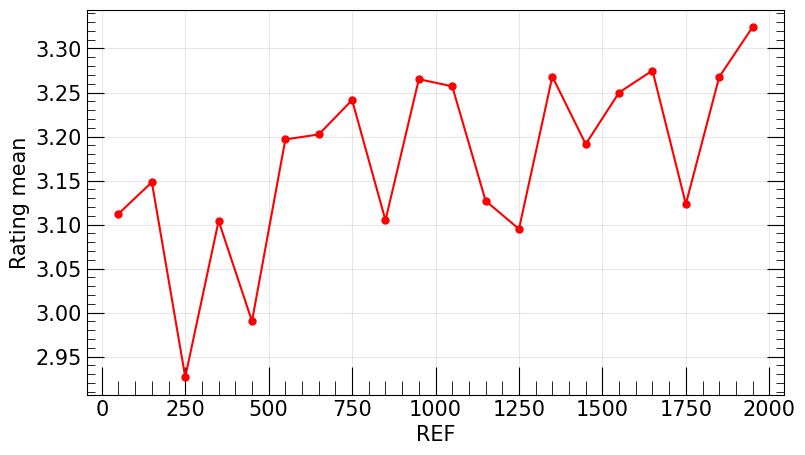

In [11]:
REF_bins = np.arange(0, 2100, 100)
REF_bin_centers = [(REF_bins[i+1] + REF_bins[i]) / 2 for i in range(REF_bins.shape[0]-1)]

plt.figure(figsize=(9, 5))
plt.plot(REF_bin_centers, mean_rating_in_bins(df_train, 'REF', REF_bins), 'o-r')
plt.xlabel('REF')
plt.ylabel('Rating mean')
plt.show()

На графике наблюдается что-то отдалённо напоминающее зависимость Rating от REF. Чем выше значение предиктора REF, тем выше вероятность того, что у шоколада будет выский рейтинг.<br>
Также между ними существует небольшая корреляция.

In [12]:
df_train[['REF', 'Rating']].corr()

,REF,Rating
REF,1.000000,0.112792
Rating,0.112792,1.000000


### 2.1.2 Review

Мы видим, что предикторы 'REF' и 'Review' практически линейно зависимы. Этого стоило ожидать. В целом можно исключить один из них и даже нужно, если мы будем строить линейные модели.

In [13]:
df_train[['REF', 'Review', 'Rating']].corr()

,REF,Review,Rating
REF,1.000000,0.984938,0.112792
Review,0.984938,1.000000,0.111826
Rating,0.112792,0.111826,1.000000


### 2.1.3 Cocoa Percent

Cocoa Percent имеет распределение близкое к нормальному, стандартное отклонение не очень велико.

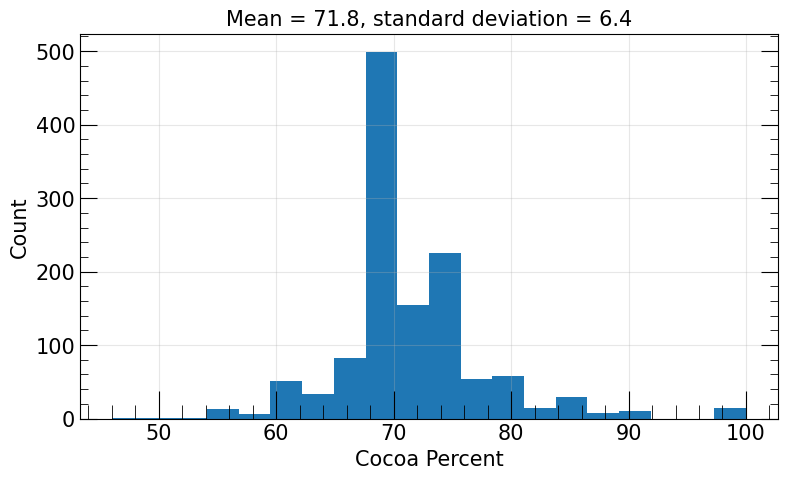

In [14]:
plt.hist(df_train['Cocoa Percent'], bins=20)
plt.title(f"Mean = {round(df_train['Cocoa Percent'].mean(), 1)}, standard deviation = {round(df_train['Cocoa Percent'].std(), 2)}")
plt.xlabel('Cocoa Percent')
plt.ylabel('Count')
plt.show()

На графике видно, что шоколад с очень большим процентом содержания какао в среднем имеет более низкий рейтинг.

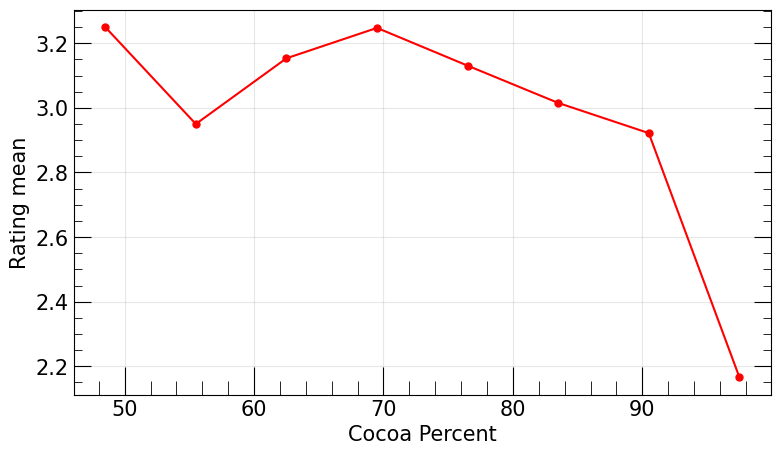

In [15]:
CocoaPercent_bins = np.arange(45, 105, 7)
CocoaPercent_bin_centers = [(CocoaPercent_bins[i+1] + CocoaPercent_bins[i]) / 2 for i in range(CocoaPercent_bins.shape[0]-1)]

plt.plot(CocoaPercent_bin_centers,
         mean_rating_in_bins(df_train, 'Cocoa Percent', CocoaPercent_bins),
         'o-r')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating mean')
plt.show()

In [16]:
df_train[['Cocoa Percent', 'Rating']].corr()

,Cocoa Percent,Rating
Cocoa Percent,1.000000,-0.172411
Rating,-0.172411,1.000000


### 2.1.4. Correlation matrix (numeric features)

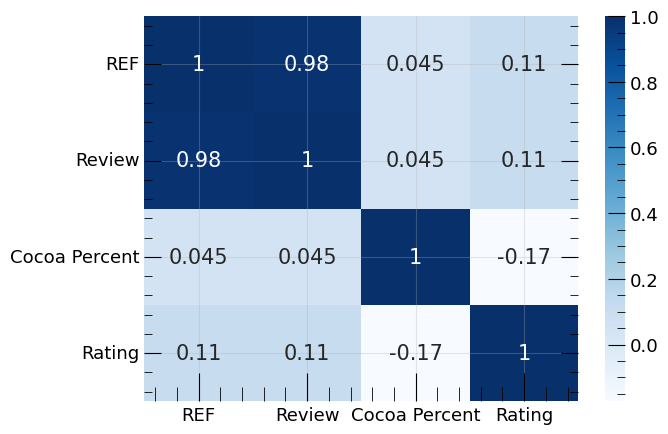

In [17]:
plt.figure(figsize = (7,5))
plt.rcParams.update({
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
})
sns.heatmap(df_train.corr(), annot=True, cmap="Blues")

plt.show()

Подводя итоги анализа численных предикторов, можно сказать:
* Один из двух сильно скоррелированных предикторов "REF" и "Review" можно исключить
* Предикторы скоррелированы (хоть и не сильно) с целевой переменной "Rating" и могут иметь предсказательную силу. Вдальнейшем они вряд ли будут отброшены

## 2.2 Categorical features

В этой части мы не будем подробно изучать категориальные признаки, лишь посмотрим на количество категорий и корреляцию их друг с другом. Более подробный анализ будет предствален в главе, посвященной разработке новых предикторов на их основе (Feature Engineering)

In [18]:
print("Number of unique values", 30*"-", sep='\n')

for col in df_train.columns[df_train.dtypes == object]:
    print(f"{col}: {df_train[col].nunique()}")

Number of unique values
------------------------------
Company: 376
Specific Bean Origin: 762
Company Location: 56
Bean Type: 38
Broad Bean Origin: 83


In [19]:
import association_metrics as am

XC = df_train.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(XC)
cramersv.fit()

,Company,Specific Bean Origin,Company Location,Bean Type,Broad Bean Origin
Company,1.000000,0.771074,0.999638,0.616841,0.603562
Specific Bean Origin,0.771074,1.000000,0.811367,0.907956,0.985204
Company Location,0.999638,0.811367,1.000000,0.241511,0.389432
Bean Type,0.616841,0.907956,0.241511,1.000000,0.388054
Broad Bean Origin,0.603562,0.985204,0.389432,0.388054,1.000000


Сильно скоррелированные признаки:
* Company и Company Location
* Broad Bean Origin и Specific Bean Origin
* Bean Type и Specific Bean Origin

Возморжно, часть из этих признаков будет отброшена вдальнейшем, однако пока они нужны нам для построения новых признаков.

# 3 Outliers

Посмотрим на выбросы в данных лишь ради интереса. Практика показала, что исключение объектов из тренировочных данных не приводит улучшению качества моделей. Также посмотрим на распределение целевой переменной.

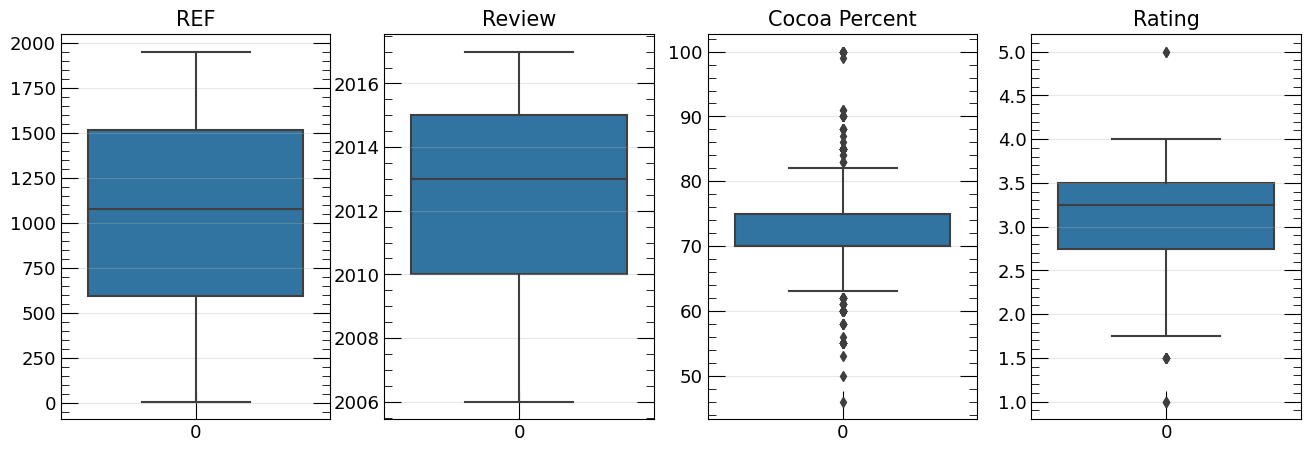

In [20]:
cat_cols = df_train.columns[df_train.dtypes == 'object']
num_cols = df_train.columns[df_train.dtypes != 'object']

fig, ax = plt.subplots(1, 4, figsize=(16, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(df_train[col], ax=ax[i])
    ax[i].set_title(col)

plt.show()

Целевая переменная: рейтинг от 1 до 5 с шагом 0.25

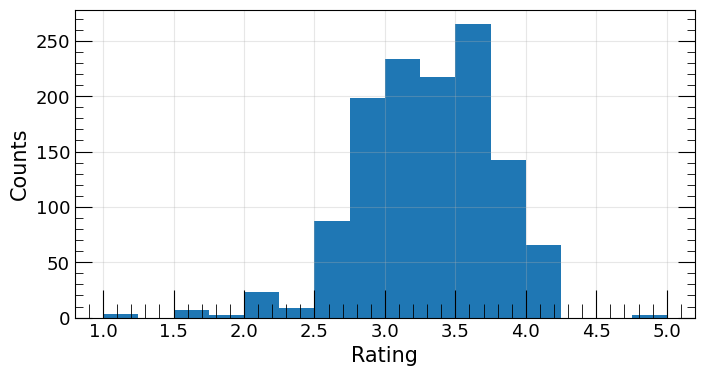

In [21]:
plt.figure(figsize=(8, 4))
plt.hist(df_train['Rating'], bins=16)
plt.xlabel('Rating')
plt.ylabel("Counts")
plt.show()

Выводы:
* Целевая переменная 'Rating' имеет точки, которые можно интерпретировать как выбросы, однако мы не будем удалять их
* Переменная 'Cocoa Percent', как мы видели выше, имеет очень узкое распределение, поэтому много точек потенциально могут быть интерпретированы как выбросы, но объекты с такими параметрами мы также не будем исключать из тренировочной выборки

# 4 Data Preprocessing

Теперь попробуем заполнить пропуски в колонках "Bean Type" и "Broad Bean Origin" с помощью классификатороа CatBoost. Потенциально это может улучшить качество конечной модели.

Хоть перемешивать тренировочные данные с тестовыми и тренировать на них некий трансформатор и неправильно, именно этим мы и будем заниматься. Здесь мы лишь тестируем метод для заполнения пропусков. В главе 8 (Pipelines) класс FeatureFixer, заполняющий пропуски, будет переопределён, чтобы обучаться только на тренировочных данных и тогда будет работать как надо.

В целом несколько эту главу __можно пропустить__, так как позже __в главе 8__ будет дано более корректное определение класса для заполнения пропусков.

In [22]:
optuna.logging.set_verbosity(optuna.logging.INFO)
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [23]:
class FeatureFixer:
    
    """
    column - признак, который мы будем прогнозировать ('Broad Bean Origin' или 'Bean Type')
    train - тренировочный набор данных
    test - тестовый набор данных
    """
    def __init__(self, column: str, train: pd.DataFrame, test: pd.DataFrame):
        self.train_init = train
        self.test_init = test
        self.column = column
        

    @staticmethod
    def label_accuracy(y_true: pd.Series, y_pred: np.ndarray):
        """Простая метрика для оценки качества модели"""
        df_pred = pd.DataFrame({'True values': y_true.values, 'Predicted values': y_pred[:, 0]})
        return (df_pred['True values'] == df_pred['Predicted values']).sum() / df_pred.shape[0]
    
    
    def resplit(self, cols_to_drop: list, n_top: int):
        """
        Переразбивает изначальные train и test для работы над прогнозированием колонки
        cols_to_drop - признаки, от кооторых нужно избавиться. Это 'Rating' и тот признак, который мы ещё не спрогнозировали
        """
        # from initial train
        # train
        train_col_from_train = self.train_init[(self.train_init[self.column] != 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        # test
        test_col_from_train = self.train_init[(self.train_init[self.column] == 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        
        # from initial test
        # train
        cols_to_drop.remove('Rating')
        train_col_from_test = self.test_init[(self.test_init[self.column] != 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        # test
        test_col_from_test = self.test_init[(self.test_init[self.column] == 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        
        # train
        self.X = pd.concat([
            train_col_from_train.drop(self.column, axis=1),
            train_col_from_test.drop(self.column, axis=1)
        ])

        self.y = pd.concat([
            train_col_from_train[self.column],
            train_col_from_test[self.column]
        ])
        
        # test ("Unknown" parts of datasets)
        self.X_test_from_train = test_col_from_train.drop([self.column], axis=1)
        self.X_test_from_test = test_col_from_test.drop([self.column], axis=1)
        
        # Most probable bean origins
        top_values = self.y.value_counts()[:n_top].index
        top_values_mask = self.y.apply(lambda x: x in top_values)

        # train on top n values of column only
        self.X = self.X[top_values_mask]
        self.y = self.y[top_values_mask]

        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X, self.y, test_size=0.2)
        self.categorical_features_indices = np.where(self.X.dtypes == object)[0]
        
        
    def hyperparameters_tunning(self, n_trials: int):
        """Подбор гиперпараметров модели"""
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, step=0.001)
            }

            estimator = CatBoostClassifier(**param,
                                           cat_features=self.categorical_features_indices,
                                           verbose=False)

            estimator.fit(self.X_train, self.y_train)
            pred = estimator.predict(self.X_val)

            return self.label_accuracy(self.y_val, pred)

        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=n_trials, n_jobs=-1)
        #print(study.best_trial)
        
        
        self.best_params = study.best_params
        self.model = CatBoostClassifier(**study.best_params,
                                       cat_features=self.categorical_features_indices,
                                       logging_level='Silent')
        
        self.model.fit(self.X_train, self.y_train)
        y_pred = self.model.predict(self.X_val)
        
        print(f"Best accuracy = {self.label_accuracy(self.y_val, y_pred)}")
        
        self.df_importance = pd.DataFrame({'Feature': self.model.feature_names_,
                                           'CatBoost Importance': self.model.feature_importances_})\
                                           .sort_values(by='CatBoost Importance', ascending=False)
        display(self.df_importance)
        
        
    def fit(self):
        self.model.fit(self.X, self.y)
        
        
    def predict(self):
        pred_train = self.model.predict(self.X_test_from_train)
        pred_test = self.model.predict(self.X_test_from_test)
        
        # Indices of rows with "Unknown" value from intiinal datasets
        index_train = self.train_init[(self.train_init[self.column] == 'Unknown')].index
        index_test = self.test_init[(self.test_init[self.column] == 'Unknown')].index
        
        train_output = self.train_init.copy()
        test_output = self.test_init.copy()
        
        # Replace values in chosen column with model output
        train_output.loc[index_train, [self.column]] = pred_train[:, 0]
        test_output.loc[index_test, [self.column]] = pred_test[:, 0]
        
        return train_output, test_output
    

Проверим, что класс работает, как задумано. Подобранные гиперпараметры моделей не так важны, так как вдальнейшем мы подберём их снова с учётом новых предикторов.

In [25]:
# class to impute Broad Bean Origin
fixer_bbo = FeatureFixer('Broad Bean Origin', df_train, df_test)
fixer_bbo.resplit(cols_to_drop=['Bean Type', 'Rating'], n_top=11)
fixer_bbo.hyperparameters_tunning(n_trials=3)
fixer_bbo.fit()
df_train_new, df_test_new = fixer_bbo.predict()

Best accuracy = 0.6680672268907563


,Feature,CatBoost Importance
1,Specific Bean Origin,57.346744
5,Company Location,22.614843
0,Company,11.202929
2,REF,5.882546
4,Cocoa Percent,2.026798
3,Review,0.926140


{'learning_rate': 0.079, 'logging_level': 'Silent', 'max_depth': 2, 'n_estimators': 698, 'cat_features': array([0, 1, 5])}


In [26]:
# class to impute Broad Bean Origin
fixer_bt = FeatureFixer('Bean Type', df_train_new, df_test_new)
fixer_bt.resplit(cols_to_drop=['Rating'], n_top=7)
fixer_bt.hyperparameters_tunning(n_trials=3)
fixer_bt.fit()
df_train_new, df_test_new = fixer_bt.predict()

Best accuracy = 0.7590361445783133


,Feature,CatBoost Importance
6,Broad Bean Origin,65.933653
5,Company Location,13.683082
1,Specific Bean Origin,7.599277
0,Company,6.280127
3,Review,3.483163
2,REF,2.684343
4,Cocoa Percent,0.336355


{'learning_rate': 0.005, 'logging_level': 'Silent', 'max_depth': 5, 'n_estimators': 974, 'cat_features': array([0, 1, 5, 6])}


# 5 Feature Engineering

На этом этапе мы постараемся создать новые предикторы на основе уже существующих, чтобы улучшить качество предсказаний на данных. Ниже будет приведён список некоторых идей, которые я применял на этапе исследования. Не все они будут реализованы в этом ноутбуке (финальной версии исследования), так как многие из них приводят к ухудшению качества предсказаний на данных.

1. На основании страны производителя ('Company Location') построить переменную региона производства ('Broad Company Location'). Это будет континент или часть света (Africa, Caribbean, etc)
2. Проделать то же самое для колонки 'Broad Bean Origin' ($\rightarrow$ 'Bean Origin World')
3. Анализ текста переменных 'Specific Bean Origin' и 'Company'. Здесь всё становится интереснее. Я провёл аналогию с виноделием: чем более специфическим является регион выращивания винограда, тем, как мы считаем, выше качество продукта (IGT, DOC, DOCG, ...). Аналогия не точная, так как маркировка вина базируется на более неочевидных для меня критериях, но смысл понятен: чем более "комплексное" название имеет специфический регион происхождения какао-бобов (Specific Bean Origin), тем выше вкусовые свойства шоколада.


Отброшенные идеи генерации предикторов, в том числе, на основании экзогенных данных:
1. Бинарный предиктор, содержащий информацию о том, присутствует ли страна-производитель в списке стран, которые знамениты качеством шоколада. Такую информацию можно взять из какого-нибудь рейтинга в интернете. Здесь такой предиктор не создаётся, так как было выяснено, что добавление его не улучшает качество предсказания на данных. Более того, похоже, что интернет-рейтинги не сильно коррелируют с рейтингом в наших данных.
2. Бинарный предиктор для стран, производящих наибольшее количество какао (Company Location или Bean Origin соответствуют такой стране). Как и в случае с предыдущим не был использован.
3. Бинарный предиктор, говорящий о том, свопадает ли 'Company Location' с 'Broad Bean Origin'. Не помогает
4. Цена плитки шоколада данной компании в долларах США (можно нормировать на 100 г). Очевидное преположение: чем дороже шоколад, тем он лучше. Цены на шоколад некоторых производителей из списка можно найти в интернете, однако в данных рейтинг присваивался конкретной плитке шоколада и найти именно её цену - слишком сложная задача для ручного поиска (не всегда выполнимая). Также мною было замечено, что шоколад стоит дороже в некоторых странах, например, США и существенной корреляции с рейтингом обнаружено не было.

Можно пойти и дальше. Существуют сайты, которые дают оценку шоколаду, например <br>
https://www.c-spot.com/

Многие компании из списка можно найти там, возможно даже конкретные плитки шоколада. Я не стал включать этот экзогенный признак, так как <br>
а) Необходимо писать scrapper, а выхлоп может оказаться минимальным (хотя на этом этапе мы уже боремся за сотые, если не тысячные R2 score) <br>
б) В широком смысле можно рассматривать это как читинг, ведь это тоже рейтинг, хоть и независимый


In [27]:
df_train = pd.read_csv('data_initial/chocolate_train.csv')
df_test = pd.read_csv('data_initial/chocolate_test_new.csv')

df_train = preprocessing_step1(df_train)
df_test = preprocessing_step1(df_test)

df_train_new = df_train.copy()
df_test_new = df_test.copy()

In [28]:
from string import digits

In [29]:
broad_locations = {'Europe': ['U.K.', 'Switzerland', 'France', 'Belgium', 'Spain', 'Italy',
                              'Austria', 'Sweden', 'Ireland', 'Poland', 'Hungary', 'Germany',
                              'Denmark', 'Lithuania', 'Scotland', 'Finland', 'Iceland',
                              'Amsterdam', 'Wales', 'Netherlands', 'Portugal', 'Czech Republic'],
                   'North America': ['U.S.A.', 'Canada'],
                   'Africa': ['Madagascar', 'South Africa', 'Ghana', 'Sao Tome', 'Tanzania',
                              'Indonesia', 'Congo', 'Liberia', 'Principe', 'Sao Tome & Principe',
                              'Gabon', 'Ivory Coast', 'Uganda', 'Nigeria', 'West Africa'],
                   'Caribbean': ['Colombia', 'Venezuela', 'Honduras', 'Guatemala',
                                 'Domincan Republic', 'Grenada', 'Puerto Rico', 'Costa Rica',
                                 'St. Lucia', 'Nicaragua', 'Martinique', 'Niacragua', 'Cost Rica, Ven',
                                 'Trinidad', 'Panama', 'Jamaica', 'Haiti', 'Cuba', 'Venezuela, Ghana',
                                 'Ven.,Ecu.,Peru,Nic.', 'Tobago', 'Carribean(DR/Jam/Tri)',
                                 'Venezuela, Java', 'Ven, Bolivia, D.R.', 'Venezuela, Carribean',
                                 'Dominican Republic', 'Carribean'],
                   'Asia & Oceania': ['Japan', 'Vietnam', 'Philippines', 'Fiji', 'Australia',
                                      'South Korea', 'Israel', 'Singapore', 'India', 'Russia',
                                      'New Zealand', 'Papua New Guinea', 'Hawaii', 'Solomon Islands',
                                      'Sri Lanka', 'Malaysia', 'Samoa', 'Philippines', 'Togo',
                                      'Vanuatu'],
                   'South America': ['Ecuador', 'Brazil', 'Peru', 'Eucador', 'Argentina',
                                     'Chile', 'Mexico', 'Bolivia', 'Suriname', 'Peru, Dom. Rep',
                                     'Central and S. America', 'Colombia, Ecuador', 'Dom. Rep., Madagascar',
                                     'South America', 'Belize', 'El Salvador'],
                   'Mixed': ['Trinidad, Ecuador', 'South America, Africa', 'PNG, Vanuatu, Mad',
                             'Mad., Java, PNG', 'Peru, Mad., Dom. Rep.', 'Indonesia, Ghana', 'Madagascar & Ecuador',
                             'Venez,Africa,Brasil,Peru,Mex', 'DR, Ecuador, Peru', 'Dominican Rep., Bali',
                             'Peru, Madagascar', 'Venezuela, Dom. Rep.', 'Peru, Ecuador, Venezuela',
                             'Ven., Trinidad, Mad.', 'Ven., Indonesia, Ecuad.', 'Ghana, Domin. Rep',
                             'Peru, Belize', 'Guat., D.R., Peru, Mad., PNG']
                   }

def location_in_list(location: str, locations_dict:dict=broad_locations) -> str:
    for k, v in broad_locations.items():
        if location in v:
            return k
    return 'Other'

def length_bin(s: str, min_val:int=0, max_val:int=50, step:int=10) -> int:
    n = len(s)
    bins = np.arange(min_val, max_val+step, step)
    for i in range(bins.shape[0]):
        if n > bins[i] and n <= bins[i+1]:
            return i

In [30]:
def add_features(data: pd.DataFrame) -> pd.DataFrame:
    data_new = data.copy()
    # Broad Locations
    data_new['Broad Company Location'] = data_new['Company Location'].apply(lambda x: location_in_list(x))
    # Comlexity of names
    data_new['SBO complexity'] = data_new['Specific Bean Origin'].apply(lambda x: x.count('.') + x.count(',') + x.count(' '))
    
    return data_new

In [31]:
def add_features2(data: pd.DataFrame) -> pd.DataFrame:
    data_new = data.copy()
    # Broad Locations
    data_new['Bean Origin World'] = data_new['Broad Bean Origin'].apply(lambda x: location_in_list(x))
    
    return data_new

In [32]:
df_train_new = add_features(df_train_new)
df_test_new = add_features(df_test_new)

df_train = add_features(df_train)
df_test = add_features(df_test)

Здесь мы подбираем гиперпараметры моделей заполнения пропусков, чтобы вдальнейшем их использовать. 

In [33]:
%%time

# class to impute Broad Bean Origin
fixer_bbo = FeatureFixer('Broad Bean Origin', df_train, df_test)
fixer_bbo.resplit(cols_to_drop=['Bean Type', 'Rating'], n_top=11)
fixer_bbo.hyperparameters_tunning(n_trials=30)
fixer_bbo.fit()

Best accuracy = 0.6722689075630253


,Feature,CatBoost Importance
1,Specific Bean Origin,61.641183
5,Company Location,15.985350
6,Broad Company Location,13.550605
0,Company,3.915358
2,REF,1.791844
3,Review,1.319091
7,SBO complexity,1.233868
4,Cocoa Percent,0.562701


CPU times: user 2h 47min 21s, sys: 2min 56s, total: 2h 50min 18s
Wall time: 10min 55s


In [34]:
df_train_new, df_test_new = fixer_bbo.predict()

fixer1_params = fixer_bbo.model.get_params()
print(fixer1_params)

{'learning_rate': 0.012, 'logging_level': 'Silent', 'max_depth': 9, 'n_estimators': 341, 'cat_features': array([0, 1, 5, 6])}


In [35]:
%%time

# class to impute Broad Bean Origin
fixer_bt = FeatureFixer('Bean Type', df_train_new, df_test_new)
fixer_bt.resplit(cols_to_drop=['Rating'], n_top=7)
fixer_bt.hyperparameters_tunning(n_trials=30)
fixer_bt.fit()
df_train_new, df_test_new = fixer_bt.predict()

Best accuracy = 0.8132530120481928


,Feature,CatBoost Importance
6,Broad Bean Origin,46.452729
7,Broad Company Location,14.005850
5,Company Location,12.791394
0,Company,8.370913
2,REF,8.197982
1,Specific Bean Origin,3.260292
8,SBO complexity,2.832763
3,Review,2.106675
4,Cocoa Percent,1.981403


CPU times: user 37min 5s, sys: 3min 16s, total: 40min 21s
Wall time: 2min 44s


In [36]:
fixer2_params = fixer_bt.model.get_params()
print(fixer2_params)

{'learning_rate': 0.041, 'logging_level': 'Silent', 'max_depth': 6, 'n_estimators': 782, 'cat_features': array([0, 1, 5, 6, 7])}


In [37]:
df_train_new = add_features2(df_train_new)
df_test_new = add_features2(df_test_new)

df_train = add_features2(df_train)
df_test = add_features2(df_test)

In [39]:
df_test_new.head()

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin,Broad Company Location,SBO complexity,Bean Origin World
0,Ohiyo,"San Juan Estate, Gran Couva",1594,2015,70.0,U.S.A.,Trinitario,Trinidad,North America,5,Caribbean
1,Blanxart,Organic Dark,322,2009,72.0,Spain,Criollo,Venezuela,Europe,1,Caribbean
2,Brazen,Maya Mountain,1518,2015,80.0,U.S.A.,Trinitario,Belize,North America,1,South America
3,Patric,Madagascar,439,2009,67.0,U.S.A.,Trinitario,Madagascar,North America,0,Africa
4,Potomac,"Upala, Batch 12",607,2010,82.0,U.S.A.,Matina,Costa Rica,North America,3,Caribbean


# 6 Feature selection

На данном этапе мы посмотрим, насколько скоррелированы признаки.<br>
В случае применения линейной регрессии признаки отбрасываются, если они имеют маленькую корреляцию с целевой переменной и/или большую корреляцию друг с другом, так как это увеличивает мультиколлинеарность. Снижение мультиколлинеарности не обязательно приводит к улучшению качетва любой модели, так как модели типа boosting устойчивы к эффектам мультиколлинеарности, но улучшает интерпретируемость её результатов. Например, сильно скоррелированные признаки будут делить друг с другом важность (feature importance).

## 6.1 Numeric features correlation

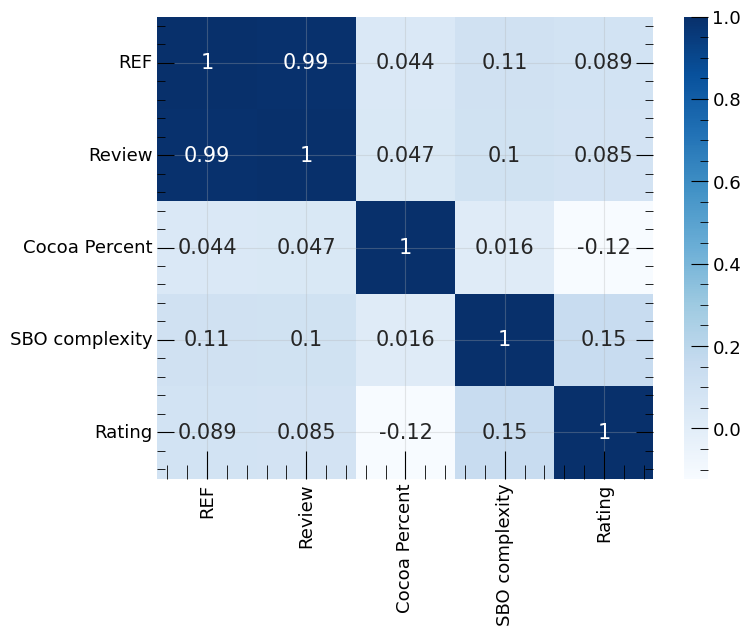

In [44]:
plt.figure(figsize = (8, 6))
plt.rcParams.update({
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
})

df_train_Rating = df_train_new.Rating
df_train_new.drop(['Rating'], axis=1, inplace=True)
df_train_new['Rating'] = df_train_Rating

sns.heatmap(df_train_new.corr(method='spearman'), annot=True, cmap="Blues")

plt.show()

Здесь мы видим, что переменные 'REF' и 'Review' скоррелированы друг с другом на уровне выше, чем 0.9.

## 6.2 Categorical features correlation

Исследуем связь между категориальными признаками, используя V-меру Крамера.

In [45]:
import association_metrics as am

XC = df_train_new.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(XC)
cramersv.fit()

,Company,Specific Bean Origin,Company Location,Bean Type,Broad Bean Origin,Broad Company Location,Bean Origin World
Company,1.000000,0.771074,0.999638,0.623592,0.602960,0.998283,0.632280
Specific Bean Origin,0.771074,1.000000,0.811367,0.908851,0.985489,0.843555,0.994288
Company Location,0.999638,0.811367,1.000000,0.256445,0.388509,1.000000,0.365876
Bean Type,0.623592,0.908851,0.256445,1.000000,0.399026,0.334257,0.428427
Broad Bean Origin,0.602960,0.985489,0.388509,0.399026,1.000000,0.454140,1.000000
Broad Company Location,0.998283,0.843555,1.000000,0.334257,0.454140,1.000000,0.298511
Bean Origin World,0.632280,0.994288,0.365876,0.428427,1.000000,0.298511,1.000000


Мы видим, что нектоторые признаки имеют значение V-меры связи близкую к 1 (максимуму):
* Broad Company Location и Company
* Company Location и Company
* Broad Bean Origin и Bean Origin

Но пока не будем спешить отбрасывать часть их этих признаков. Они могут повысить качество модели, тренированной на данных с ними.

# 7 Models

На этом этапе мы будем строить модели регрессии для предсказания рейтинга шоколада. Будем использовать CatBooostRegressor. Эта библиотека сама кодирует категориальные признаки, переданные модели. В данных содержится множество категориальных признаков и кодирование их с применением стандартных техник не только отнимет много времени на разработку, но и может дать результат, худший, чем тот, который покажет CatBoost.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV, cross_val_score

from catboost import CatBoostRegressor

## 7.1 CatBoost with default hyperparameters

Сначала посмотрим, как покажет себя регрессор с гиперпараметрами по умолчанию

In [47]:
def train_cb_regressor(data_train: pd.DataFrame, tunning:bool=False, n_trials:int=10):
    X = data_train.drop('Rating', axis=1)
    y = data_train.Rating

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

    categorical_features_indices = np.where(X.dtypes == object)[0]
    
    model = CatBoostRegressor(cat_features=categorical_features_indices,
                              logging_level='Silent')
    
    # Optuna
    if tunning:
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2, step=0.001)
                #"min_child_samples": trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
            }

            estimator = CatBoostRegressor(**param,
                                          cat_features=categorical_features_indices,
                                          custom_metric='R2',
                                          verbose=False)

            estimator.fit(X_train, y_train)
            pred = estimator.predict(X_val)

            return mean_squared_error(y_val, pred, squared=False)
        
        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=n_trials, n_jobs=-1)
        #print(study.best_trial)
        print("Best params:", study.best_trial.params)
        model = CatBoostRegressor(**study.best_params,
                                 cat_features=categorical_features_indices,
                                 logging_level='Silent')
    
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
    model.fit(X_train, y_train,
             eval_set=(X_val, y_val))

    y_pred_val = model.predict(X_val)

    print("R2 scores")
    print(f"On validation sample = {round(r2_score(y_val, y_pred_val), 3)}")
    print(f"All CV scores = {', '.join(map(lambda x: str(round(x, 3)), cv_scores))}")
    print(f"Mean CV score = {round(cv_scores.mean(), 3)}")
    
    model_permutation_importance = permutation_importance(model,
                                                          X_val,
                                                          y_val,
                                                          scoring='r2',
                                                          n_repeats=20,
                                                          n_jobs=-1)

    df_importance = pd.DataFrame({'Feature': model.feature_names_,
                                  'CatBoost Importance': model.feature_importances_,
                                  'Permutation Importance': model_permutation_importance.importances_mean,
                                  'Permutation Importance std': model_permutation_importance.importances_std})\
                                  .sort_values(by='CatBoost Importance', ascending=False)
    display(df_importance)
    return model

In [48]:
df_train.columns

Index(['Company', 'Specific Bean Origin', 'REF', 'Review', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin',
       'Broad Company Location', 'SBO complexity', 'Bean Origin World'],
      dtype='object')

Ниже мы тренируем CatBoost с гиперпараметрам по умолчанию на данных с заполненными и незаполненными пропусками

In [49]:
# Пропуски заполнены
train_cb_regressor(df_train_new)

R2 scores
On validation sample = 0.181
All CV scores = 0.123, 0.217, 0.257
Mean CV score = 0.199


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,20.418660,0.171020,0.034670
4,Cocoa Percent,18.115189,0.111468,0.020851
2,REF,10.914847,0.030277,0.008281
6,Bean Type,10.414886,-0.004479,0.013022
5,Company Location,7.342267,0.007912,0.006614
7,Broad Bean Origin,6.993170,0.003628,0.005891
10,Bean Origin World,6.053329,0.005405,0.004097
9,SBO complexity,5.826530,0.018372,0.008093
1,Specific Bean Origin,5.395377,0.005985,0.006449
8,Broad Company Location,4.981180,-0.003236,0.004360


In [50]:
# В пропусках уникальное значение "Unknown"
train_cb_regressor(df_train)

R2 scores
On validation sample = 0.192
All CV scores = 0.116, 0.23, 0.239
Mean CV score = 0.195


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,23.561308,0.131114,0.022743
4,Cocoa Percent,18.745677,0.078675,0.015425
6,Bean Type,10.959834,0.016643,0.013720
5,Company Location,9.039162,0.019753,0.007685
2,REF,8.175296,0.017767,0.006831
7,Broad Bean Origin,6.989332,0.002689,0.003483
10,Bean Origin World,5.735166,-0.004223,0.003612
9,SBO complexity,5.650761,0.029512,0.008977
3,Review,5.588846,0.007527,0.004378
8,Broad Company Location,4.595166,-0.000801,0.003202


Как видно, результаты сильно зависят от разбиения выборки на тренировчную и тестовую часть. Но одно можно сказать наверняка: колонку "Specific Bean Origin" можно выкинуть. Также мы видим, что качество предсказаний (на валидационной части и cross validation) очень близко для данных с заполненными пропусками и с незаполненными

## 7.2 Hyperparameters tunning

Подберём гиперпараметры регрессора. Видно, что обе модели, с заполненными и незаполненными пропусками улучшили свои метрики.

In [51]:
model_cb1 = train_cb_regressor(df_train, True, 100)
cb_regressor_params = model_cb1.get_params()

Best params: {'n_estimators': 123, 'max_depth': 2, 'learning_rate': 0.181}
R2 scores
On validation sample = 0.235
All CV scores = 0.133, 0.251, 0.243
Mean CV score = 0.209


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,30.109549,0.178658,0.014748
4,Cocoa Percent,27.787423,0.139974,0.023851
2,REF,10.264065,0.013697,0.009902
6,Bean Type,9.973796,0.018252,0.006853
3,Review,7.406503,0.008481,0.007515
9,SBO complexity,5.341618,0.029655,0.008383
5,Company Location,3.880149,0.003122,0.005010
1,Specific Bean Origin,1.537402,0.001365,0.002676
8,Broad Company Location,1.504870,0.000286,0.001310
7,Broad Bean Origin,1.362985,0.004114,0.001384


In [52]:
model_cb2 = train_cb_regressor(df_train_new, True, 100)
cb_regressor_new_params = model_cb2.get_params()

Best params: {'n_estimators': 706, 'max_depth': 5, 'learning_rate': 0.029}
R2 scores
On validation sample = 0.218
All CV scores = 0.132, 0.241, 0.262
Mean CV score = 0.211


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,22.385771,0.177059,0.024456
4,Cocoa Percent,20.253290,0.105238,0.018139
2,REF,10.190364,0.030735,0.009875
10,Bean Origin World,8.058428,0.006203,0.005024
6,Bean Type,7.776285,0.012804,0.005430
5,Company Location,7.184851,0.006359,0.004843
9,SBO complexity,5.595123,0.021348,0.007551
7,Broad Bean Origin,5.547643,-0.001407,0.003635
3,Review,5.018115,0.017706,0.005843
8,Broad Company Location,4.995131,-0.001548,0.002501


# 8 Pipelines

Здесь мы напишем классы вместо наших функций предобработки, чтобы их можно было обернуть в sklearn Pipeline

## 8.1 Data preprocessing class

Весь процесс предобработки данных до замены пропусков

In [8]:
class DataPreprocessor(BaseEstimator, TransformerMixin):
    """
    Класс форматирует данные, чтобы подготовить их к работе.
    Этот класс можно в ключать в sklearn.Pipeline
    """
    def __init__(self):
        pass
        
        
    def fit(self, X: pd.DataFrame, y: pd.Series=None):
        """Метод fit() этому классу не нужен, он ничего не делает"""
        return self
    
    
    def transform(self, X: pd.DataFrame, y: pd.Series=None) -> pd.DataFrame:
        """Метод transform() преобразует данные"""
        X_ = X.copy()
        X_['Cocoa Percent'] = X_['Cocoa Percent'].apply(lambda x: float(x.strip('%')))
        X_ = X_.fillna("Unknown")
        X_['Broad Bean Origin'] = X_['Broad Bean Origin'].replace('\xa0', "Unknown")
        X_['Bean Type'] = X_['Bean Type'].replace('\xa0', "Unknown")
        X_.replace(
        {
            'Eucador': 'Ecuador',
            'Domincan Republic': 'Dominican Republic',
            'Niacragua': 'Nicaragua'
        },
        inplace=True)
        
        return X_

## 8.2 Feature engineering class

Добавление новых предикторов

In [9]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    """Класс для добавления новых признаков в данные
    Может быть включен в sklearn.Pipeline
    """
    BROAD_LOCATION = {'Europe': ['U.K.', 'Switzerland', 'France', 'Belgium', 'Spain', 'Italy',
                                  'Austria', 'Sweden', 'Ireland', 'Poland', 'Hungary', 'Germany',
                                  'Denmark', 'Lithuania', 'Scotland', 'Finland', 'Iceland',
                                  'Amsterdam', 'Wales', 'Netherlands', 'Portugal', 'Czech Republic'],
                       'North America': ['U.S.A.', 'Canada'],
                       'Africa': ['Madagascar', 'South Africa', 'Ghana', 'Sao Tome', 'Tanzania',
                                  'Indonesia', 'Congo', 'Liberia', 'Principe', 'Sao Tome & Principe',
                                  'Gabon', 'Ivory Coast', 'Uganda', 'Nigeria', 'West Africa'],
                       'Caribbean': ['Colombia', 'Venezuela', 'Honduras', 'Guatemala',
                                     'Domincan Republic', 'Grenada', 'Puerto Rico', 'Costa Rica',
                                     'St. Lucia', 'Nicaragua', 'Martinique', 'Niacragua', 'Cost Rica, Ven',
                                     'Trinidad', 'Panama', 'Jamaica', 'Haiti', 'Cuba', 'Venezuela, Ghana',
                                     'Ven.,Ecu.,Peru,Nic.', 'Tobago', 'Carribean(DR/Jam/Tri)',
                                     'Venezuela, Java', 'Ven, Bolivia, D.R.', 'Venezuela, Carribean',
                                     'Dominican Republic', 'Carribean'],
                       'Asia & Oceania': ['Japan', 'Vietnam', 'Philippines', 'Fiji', 'Australia',
                                          'South Korea', 'Israel', 'Singapore', 'India', 'Russia',
                                          'New Zealand', 'Papua New Guinea', 'Hawaii', 'Solomon Islands',
                                          'Sri Lanka', 'Malaysia', 'Samoa', 'Philippines', 'Togo',
                                          'Vanuatu'],
                       'South America': ['Ecuador', 'Brazil', 'Peru', 'Eucador', 'Argentina',
                                         'Chile', 'Mexico', 'Bolivia', 'Suriname', 'Peru, Dom. Rep',
                                         'Central and S. America', 'Colombia, Ecuador', 'Dom. Rep., Madagascar',
                                         'South America', 'Belize', 'El Salvador'],
                       'Mixed': ['Trinidad, Ecuador', 'South America, Africa', 'PNG, Vanuatu, Mad',
                                 'Mad., Java, PNG', 'Peru, Mad., Dom. Rep.', 'Indonesia, Ghana', 'Madagascar & Ecuador',
                                 'Venez,Africa,Brasil,Peru,Mex', 'DR, Ecuador, Peru', 'Dominican Rep., Bali',
                                 'Peru, Madagascar', 'Venezuela, Dom. Rep.', 'Peru, Ecuador, Venezuela',
                                 'Ven., Trinidad, Mad.', 'Ven., Indonesia, Ecuad.', 'Ghana, Domin. Rep',
                                 'Peru, Belize', 'Guat., D.R., Peru, Mad., PNG']
                       }
    
    
    def __init__(self, add_bean_origin_world=False):
        self.add_bean_origin_world = add_bean_origin_world
    
    def location_in_list(self, location: str):
        for k, v in self.BROAD_LOCATION.items():
            if location in v:
                return k
        return 'Other'

    @staticmethod
    def length_bin(s: str, min_val:int=0, max_val:int=50, step:int=10) -> int:
        n = len(s)
        bins = np.arange(min_val, max_val+step, step)
        for i in range(bins.shape[0]):
            if n > bins[i] and n <= bins[i+1]:
                return i
        
    def fit(self, X: pd.DataFrame, y: pd.Series=None):
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.Series=None) -> pd.DataFrame:
        X_ = X.copy()
        X_['Broad Company Location'] = X_['Company Location'].apply(lambda x: self.location_in_list(x))
        X_['SBO complexity'] = X_['Specific Bean Origin'].apply(lambda x: x.count('.') + x.count(',') + x.count(' '))
        if self.add_bean_origin_world:
            X_['Bean Origin World'] = X_['Broad Bean Origin'].apply(lambda x: self.location_in_list(x))
        
        return X_

## 8.3 FeatureFixer class

Адаптируем функцию заполнения пропусков FeatureFixer для построения Pipilines. Также, исключим момент обучения его на тестовых данных (что, скорее всего ухудшит качество прогнозов).

In [10]:
optuna.logging.set_verbosity(optuna.logging.INFO)

In [11]:
class FeatureFixer(BaseEstimator, TransformerMixin):
    
    """
    column - признак, который мы будем прогнозировать ('Broad Bean Origin' или 'Bean Type')
    cols_to_drop - колонки, которые необходимо исключить при обуении модели, наприме, если в них есть пропуски
    n_top - число наиболее часто встречающихся значений для обучения
    n_trial - число итераций обучения для Optuna
    marker - строка, являющая индикатором пропуска в данных
    """
    def __init__(self,
                 column:str,
                 cols_to_drop:list,
                 n_top:int,
                 catboost_params:dict=None,
                 tunning:bool=False,
                 n_trials:int=3,
                 marker:str="Unknown",
                 target:str='Rating'):
        self.column = column
        self.cols_to_drop = cols_to_drop
        self.n_top = n_top
        self.n_trials = n_trials
        self.marker = marker
        self.tunning = tunning
        self.target = target
        self.model = CatBoostClassifier()
        self.catboost_params = catboost_params
        
    
    @staticmethod
    def label_accuracy(y_true: pd.Series, y_pred: np.ndarray):
        """Простая метрика для оценки качества модели"""
        df_pred = pd.DataFrame({'True values': y_true.values, 'Predicted values': y_pred[:, 0]})
        return (df_pred['True values'] == df_pred['Predicted values']).sum() / df_pred.shape[0]
        
        
    def hyperparameters_tunning(self, X:pd.DataFrame, y:pd.Series, categorical_features_indices: pd.Series) -> CatBoostClassifier:
        """Подбор гиперпараметров модели"""
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
        
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, step=0.001)
            }

            estimator = CatBoostClassifier(**param,
                                           cat_features=categorical_features_indices,
                                           verbose=False)

            estimator.fit(X_train, y_train)
            pred = estimator.predict(X_val)

            return self.label_accuracy(y_val, pred)

        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=self.n_trials, n_jobs=-1)
        #print(study.best_trial)
        
        self.best_params = study.best_params
        best_model = CatBoostClassifier(**study.best_params,
                                       cat_features=categorical_features_indices,
                                       logging_level='Silent')
        
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_val)
        
        print(f"Best accuracy = {self.label_accuracy(y_val, y_pred)}")
        return best_model
        
        
    def fit(self, X: pd.DataFrame, y=None):
        """Обучение модели заполнения пропусков"""
        # part of data to train on
        X_train = X[(X[self.column] != self.marker)].drop(self.cols_to_drop+[self.column], axis=1)
        y_train = X[(X[self.column] != self.marker)][self.column]
        
        # Most probable bean origins
        top_values = y_train.value_counts()[:self.n_top].index
        top_values_mask = y_train.apply(lambda x: x in top_values)

        # train on top n values of column only
        X_train = X_train[top_values_mask]
        y_train = y_train[top_values_mask]
        
        categorical_features_indices = np.where(X_train.dtypes == object)[0]
        if self.catboost_params == None:
            self.model = CatBoostClassifier(cat_features=categorical_features_indices,
                                            verbose=False)
        else:
            self.model = CatBoostClassifier(**self.catboost_params)
        if self.tunning:
            self.model = self.hyperparameters_tunning(X_train, y_train, categorical_features_indices)
        self.model.fit(X_train, y_train)
        self.df_importance = pd.DataFrame({'Feature': self.model.feature_names_,
                                           'CatBoost Importance': self.model.feature_importances_})\
                                           .sort_values(by='CatBoost Importance', ascending=False)
        
        return self
        
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """Применяем к данным"""
        X_ = X.copy()
        # part of data to apply to
        if self.target in X.columns:
            X_test = X_[(X_[self.column] == self.marker)].drop(self.cols_to_drop+[self.column], axis=1)
        else:
            X_test = X_[(X_[self.column] == self.marker)].drop(self.cols_to_drop+[self.column], axis=1)
        # prediction for column
        column_pred = self.model.predict(X_test)
        X_.loc[(X_[self.column] == self.marker), self.column] = column_pred
        return X_

    
    def fit_transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """Обучение + применение, можно использовать на train"""
        self.fit(X, y)
        return self.transform(X)
        
        
    def predict(self, X_test: pd.DataFrame) -> np.ndarray:
        y_pred = self.model.predict(X_test)
        return y_pred[:, 0]
    

Перезагружаем данные, чтобы снова получить исходные наборы.

In [58]:
df_train = pd.read_csv('data_initial/chocolate_train.csv')
df_test = pd.read_csv('data_initial/chocolate_test_new.csv')

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']

X_test = df_test

In [59]:
pipeline = Pipeline(steps=[
    ('data_preprocessor', DataPreprocessor()),
    ('feature_adder_1', FeatureEngineering(add_bean_origin_world=False)),
    ('feature_fixer_1', FeatureFixer('Broad Bean Origin', ['Bean Type'], n_top=11)),
    ('feature_fixer_2', FeatureFixer('Bean Type', [], n_top=7)),
    ('feature_adder_2', FeatureEngineering(add_bean_origin_world=True)),
    ])

In [60]:
pipeline.fit_transform(X_train, y_train)

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin,Broad Company Location,SBO complexity,Bean Origin World
0,Willie's Cacao,Rio Caribe,457,2009,72.0,U.K.,Trinitario,Venezuela,Europe,1,Caribbean
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72.0,Switzerland,Criollo,Venezuela,Europe,8,Caribbean
2,Dark Forest,Tanzania,1554,2015,70.0,U.S.A.,Criollo,Tanzania,North America,0,Africa
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72.0,U.S.A.,Trinitario,Dominican Republic,North America,0,Caribbean
4,Pralus,"Java, Indonesie",32,2006,75.0,France,Criollo,Indonesia,Europe,2,Africa
...,...,...,...,...,...,...,...,...,...,...,...
1250,Artisan du Chocolat,Madagascar,363,2009,80.0,U.K.,"Criollo, Trinitario",Madagascar,Europe,0,Africa
1251,Marana,Cusco,1884,2016,70.0,Peru,Criollo,Peru,South America,0,South America
1252,Arete,Nacional,1534,2015,68.0,U.S.A.,Forastero (Nacional),Peru,North America,0,South America
1253,Fresco,"Conacado, #212, LR, SC",642,2011,72.0,U.S.A.,Trinitario,Dominican Republic,North America,6,Caribbean


In [61]:
X_test = pipeline.transform(X_test)

In [62]:
X_test.head()

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin,Broad Company Location,SBO complexity,Bean Origin World
0,Ohiyo,"San Juan Estate, Gran Couva",1594,2015,70.0,U.S.A.,Trinitario,Trinidad,North America,5,Caribbean
1,Blanxart,Organic Dark,322,2009,72.0,Spain,Forastero (Arriba),Ecuador,Europe,1,South America
2,Brazen,Maya Mountain,1518,2015,80.0,U.S.A.,Trinitario,Belize,North America,1,South America
3,Patric,Madagascar,439,2009,67.0,U.S.A.,Trinitario,Madagascar,North America,0,Africa
4,Potomac,"Upala, Batch 12",607,2010,82.0,U.S.A.,Matina,Costa Rica,North America,3,Caribbean


Это была проверка того, что трансформация данных работает как задумано

## 8.4 Regression class (for estimation of rating)

Напишем собственный класс регрессии на основе Catboost, который можно встроить в наш pipeline и протестируем его работу

In [13]:
from catboost import CatBoostRegressor

In [14]:
class MyCatBoostRegressor(BaseEstimator, RegressorMixin):
    
    """
    n_trial - число итераций обучения для Optuna
    """
    def __init__(self, catboost_params:dict=None, tunning:bool=False, n_trials:int=3):
        self.tunning = tunning
        self.n_trials = n_trials
        self.model = CatBoostRegressor()
        self.catboost_params = catboost_params
        
        
    def hyperparameters_tunning(self, X:pd.DataFrame, y:pd.Series, categorical_features_indices: pd.Series) -> CatBoostRegressor:
        """Подбор гиперпараметров модели"""
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
        
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, step=0.001)
            }

            estimator = CatBoostRegressor(**param,
                                          cat_features=categorical_features_indices,
                                          verbose=False)

            estimator.fit(X_train, y_train)
            pred = estimator.predict(X_val)

            return mean_squared_error(y_val, pred, squared=False)

        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=self.n_trials, n_jobs=-1)
        #print(study.best_trial)
        
        self.best_params = study.best_params
        print("Best params:", study.best_trial.params)
        best_model = CatBoostRegressor(**study.best_params,
                                       cat_features=categorical_features_indices,
                                       logging_level='Silent')
        
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_val)
        
        print(f"Best MSE on val = {mean_squared_error(y_val, y_pred)}")
        print(f"Best R2 on val = {r2_score(y_val, y_pred)}")
        return best_model
        
        
    def fit(self, X: pd.DataFrame, y: pd.Series):
        """Обучение регрессора"""
        #X, y = check_X_y(X, y)
        #self.X_ = X
        #self.y_ = y
        categorical_features_indices = np.where(X.dtypes == object)[0]
        if self.catboost_params == None:
            self.model = CatBoostRegressor(cat_features=categorical_features_indices,
                                          logging_level='Silent')
        else:
            self.model = CatBoostRegressor(**self.catboost_params)
        if self.tunning:
            self.model = self.hyperparameters_tunning(X, y, categorical_features_indices)
        self.model.fit(X, y)
        self.df_importance = pd.DataFrame({'Feature': self.model.feature_names_,
                                           'CatBoost Importance': self.model.feature_importances_})\
                                           .sort_values(by='CatBoost Importance', ascending=False)
        
        return self
    
    
    def cross_validate(self, X: pd.DataFrame, y: pd.Series) -> None:
        """Кроссвалидация моедли"""
        print("Cross validation for model with parameters", self.model.get_params(), sep='\n')
        cv_scores = cross_val_score(self.model, X, y, cv=3, scoring='r2')
        print("R2 scores")
        print(f"All CV scores = {', '.join(map(lambda x: str(round(x, 3)), cv_scores))}")
        print(f"Mean CV score = {round(cv_scores.mean(), 3)}")
        
        
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        y_pred = self.model.predict(X)
        return y_pred
    

In [64]:
pipeline = Pipeline(steps=[
    ('data_preprocessor', DataPreprocessor()),
    ('feature_adder', FeatureEngineering()),
    ('regressor', MyCatBoostRegressor())
    ])

In [65]:
pipeline

Pipeline(steps=[('data_preprocessor', DataPreprocessor()),
                ('feature_adder', FeatureEngineering()),
                ('regressor', MyCatBoostRegressor())])

In [66]:
df_train = pd.read_csv('data_initial/chocolate_train.csv')
df_test = pd.read_csv('data_initial/chocolate_test_new.csv')

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']

X_test = df_test

pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessor', DataPreprocessor()),
                ('feature_adder', FeatureEngineering()),
                ('regressor', MyCatBoostRegressor())])

In [68]:
pipeline.predict(X_test)[:10]

array([3.29967614, 2.92639963, 3.01277952, 3.51639906, 2.92220467,
       2.89483375, 3.06116488, 3.14808   , 3.20538993, 2.79258897])

# 9 Stacking

In [69]:
def make_prediction(model, data_test, filename):
    X_test_ = data_test.copy()
    pred = model.predict(X_test_)
    df_submission = X_test_
    df_submission['id'] = np.arange(len(X_test_))
    df_submission['Rating'] = pred
    df_submission = df_submission[['id','Rating']]
    df_submission.to_csv(f"{filename}.csv", index=False)

## 9.1 Stacking from SKLearn Linear model

Перезагружаем исходные данные и создаём два пайплайна. Каждый из пайплайнов принимает на вход эти данные. Один из них заполняет пропуски с помощью классификатора CatBoost, другой - уникальным значением "Unknown". Затем обучаем CatBoost регрессоры на каждой из моделей и применяем stacking с помощью линейной регрессии. 

In [70]:
df_train = pd.read_csv('data_initial/chocolate_train.csv')
df_test = pd.read_csv('data_initial/chocolate_test_new.csv')

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']

X_test = df_test

In [75]:
pipeline1 = Pipeline(steps=[
    ('data_preprocessor', DataPreprocessor()),
    ('feature_adder', FeatureEngineering(add_bean_origin_world=True)),
    ('regressor', MyCatBoostRegressor(catboost_params=cb_regressor_params))
    ])

pipeline2 = Pipeline(steps=[
    ('data_preprocessor', DataPreprocessor()),
    ('feature_adder_1', FeatureEngineering(add_bean_origin_world=False)),
    ('feature_fixer_1', FeatureFixer('Broad Bean Origin', ['Bean Type'], n_top=11, catboost_params=fixer1_params)),
    ('feature_fixer_2', FeatureFixer('Bean Type', [], n_top=7, catboost_params=fixer2_params)),
    ('feature_adder_2', FeatureEngineering(add_bean_origin_world=True)),
    ('regressor', MyCatBoostRegressor(catboost_params=cb_regressor_new_params))
    ])

In [77]:
estimators = [("CatBoost_default", pipeline1), ("CatBoost_imputer", pipeline2)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model

StackingRegressor(estimators=[('CatBoost_default',
                               Pipeline(steps=[('data_preprocessor',
                                                DataPreprocessor()),
                                               ('feature_adder',
                                                FeatureEngineering(add_bean_origin_world=True)),
                                               ('regressor',
                                                MyCatBoostRegressor(catboost_params={'cat_features': array([ 0,  1,  5,  6,  7,  8, 10]),
                                                                                     'learning_rate': 0.181,
                                                                                     'logging_level': 'Silent',
                                                                                     'loss_function': 'RMSE',
                                                                                     'max_depth': 2,
                                                                                     'n_es...
                                                                              'n_estimators': 782},
                                                             cols_to_drop=[],
                                                             column='Bean Type',
                                                             n_top=7)),
                                               ('feature_adder_2',
                                                FeatureEngineering(add_bean_origin_world=True)),
                                               ('regressor',
                                                MyCatBoostRegressor(catboost_params={'cat_features': array([ 0,  1,  5,  6,  7,  8, 10]),
                                                                                     'learning_rate': 0.029,
                                                                                     'logging_level': 'Silent',
                                                                                     'loss_function': 'RMSE',
                                                                                     'max_depth': 5,
                                                                                     'n_estimators': 706}))]))],
                  final_estimator=LinearRegression())

In [78]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('CatBoost_default',
                               Pipeline(steps=[('data_preprocessor',
                                                DataPreprocessor()),
                                               ('feature_adder',
                                                FeatureEngineering(add_bean_origin_world=True)),
                                               ('regressor',
                                                MyCatBoostRegressor(catboost_params={'cat_features': array([ 0,  1,  5,  6,  7,  8, 10]),
                                                                                     'learning_rate': 0.181,
                                                                                     'logging_level': 'Silent',
                                                                                     'loss_function': 'RMSE',
                                                                                     'max_depth': 2,
                                                                                     'n_es...
                                                                              'n_estimators': 782},
                                                             cols_to_drop=[],
                                                             column='Bean Type',
                                                             n_top=7)),
                                               ('feature_adder_2',
                                                FeatureEngineering(add_bean_origin_world=True)),
                                               ('regressor',
                                                MyCatBoostRegressor(catboost_params={'cat_features': array([ 0,  1,  5,  6,  7,  8, 10]),
                                                                                     'learning_rate': 0.029,
                                                                                     'logging_level': 'Silent',
                                                                                     'loss_function': 'RMSE',
                                                                                     'max_depth': 5,
                                                                                     'n_estimators': 706}))]))],
                  final_estimator=LinearRegression())

In [79]:
stacking_model.predict(X_test)[:10]

array([3.15725122, 3.12045202, 3.08200307, 3.35847016, 2.9940845 ,
       2.82306496, 3.09157955, 3.12627058, 3.22040164, 2.70114585])

In [80]:
make_prediction(stacking_model, X_test, "Stacking_linear_v4")

## 9.2 Save model

In [82]:
pickle.dump(stacking_model, open("stacking_linear2.pickle", 'wb'))

In [83]:
saved_model = pickle.load(open("stacking_linear2.pickle", 'rb'))

# 10 More models

In [15]:
saved_model = pickle.load(open("stacking_linear2.pickle", 'rb'))

In [34]:
saved_model.estimators[0][1][2].catboost_params

{'learning_rate': 0.181,
 'loss_function': 'RMSE',
 'logging_level': 'Silent',
 'max_depth': 2,
 'n_estimators': 123,
 'cat_features': array([ 0,  1,  5,  6,  7,  8, 10])}

In [35]:
saved_model

StackingRegressor(estimators=[('CatBoost_default',
                               Pipeline(steps=[('data_preprocessor',
                                                DataPreprocessor()),
                                               ('feature_adder',
                                                FeatureEngineering(add_bean_origin_world=True)),
                                               ('regressor',
                                                MyCatBoostRegressor(catboost_params={'cat_features': array([ 0,  1,  5,  6,  7,  8, 10]),
                                                                                     'learning_rate': 0.181,
                                                                                     'logging_level': 'Silent',
                                                                                     'loss_function': 'RMSE',
                                                                                     'max_depth': 2,
                                                                                     'n_es...
                                                                              'n_estimators': 782},
                                                             cols_to_drop=[],
                                                             column='Bean Type',
                                                             n_top=7)),
                                               ('feature_adder_2',
                                                FeatureEngineering(add_bean_origin_world=True)),
                                               ('regressor',
                                                MyCatBoostRegressor(catboost_params={'cat_features': array([ 0,  1,  5,  6,  7,  8, 10]),
                                                                                     'learning_rate': 0.029,
                                                                                     'logging_level': 'Silent',
                                                                                     'loss_function': 'RMSE',
                                                                                     'max_depth': 5,
                                                                                     'n_estimators': 706}))]))],
                  final_estimator=LinearRegression())

In [37]:
df_train

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72%,U.S.A.,3.00,Trinitario,Dominican Republic
4,Pralus,"Java, Indonesie",32,2006,75%,France,3.50,Criollo,Indonesia
...,...,...,...,...,...,...,...,...,...
1250,Artisan du Chocolat,Madagascar,363,2009,80%,U.K.,3.00,"Criollo, Trinitario",Madagascar
1251,Marana,Cusco,1884,2016,70%,Peru,2.75,,Peru
1252,Arete,Nacional,1534,2015,68%,U.S.A.,3.50,Forastero (Nacional),Peru
1253,Fresco,"Conacado, #212, LR, SC",642,2011,72%,U.S.A.,3.50,,Dominican Republic


## 10.1 New models

In [40]:
df_train = preprocessing_step1(df_train)
df_test = preprocessing_step1(df_test)

Company                  object
Specific Bean Origin     object
REF                       int64
Review                    int64
Cocoa Percent           float64
Company Location         object
Rating                  float64
Bean Type                object
Broad Bean Origin        object
dtype: object